# Section 1: Dataset

Every day, Spotify releases a playlist of the top 200 streamed songs. The Kaggle dataset I found contains all of the songs from all of the top 200 playlists from January 1, 2017 to May 29, 2023. The dataset ontains basic information about every song, such as the artist and song names, the date, the artist's nationality, and the song rank. The dataset also records information from the Spotify API about audio features, such as danceability, loudness, and speechiness. The compiler of the Database also created a points system, where every day, the most streamed song is given 200 points, the second most streamed songs is given 199 points, and so on until the 200th most streamed song is given 1 point. If the song was created by multiple artists, the points are divided evenly among the artists involved. Although this metric is arbitrary, it will provide an interesting metric that we can use to draw conclusions about the most streamed artists and songs. 

I will now import pandas and load the csv data into a DataFrame referenced by "df". The csv file file is too large for me to push to GitHub. The Kaggle dataset I used can be downloaded here: https://www.kaggle.com/datasets/brunoalarcon123/top-200-spotify-songs-dataset.

In [1]:
import pandas as pd
df = pd.read_csv("Spotify_Dataset_V3.csv", delimiter = ";")
df

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651931,197,Oh Lord,MiC LOWRY,01/01/2017,0.273,0.794,-6644.0,0.068,0.022,0.000,0.377,Artist 1,MiC LOWRY,Nationality 1,United Kingdom,Europe,4,4.0,1sTUEdVO85YU8Ymk2jeAls,https://open.spotify.com/track/1sTUEdVO85YU8Ym...
651932,198,Superstition - Single Version,Stevie Wonder,01/01/2017,0.650,0.658,-10908.0,0.085,0.089,0.004,0.883,Artist 1,Stevie Wonder,Nationality 1,United States,Anglo-America,3,3.0,5lXcSvHRVjQJ3LB2rLKQog,https://open.spotify.com/track/5lXcSvHRVjQJ3LB...
651933,199,Secrets,The Weeknd,01/01/2017,0.665,0.771,-5779.0,0.053,0.016,0.000,0.764,Artist 1,The Weeknd,Nationality 1,Canada,Anglo-America,2,2.0,3DX4Y0egvc0slLcLl31h2p,https://open.spotify.com/track/3DX4Y0egvc0slLc...
651934,200,Ni**as In Paris,"JAY-Z, Kanye West",01/01/2017,0.757,0.882,-6125.0,0.248,0.076,0.000,0.684,Artist 1,JAY-Z,Nationality 1,United States,Anglo-America,1,1.0,2KpCpk6HjXXLb7nnXoXA5O,https://open.spotify.com/track/2KpCpk6HjXXLb7n...


# Section 2: Exploratory Data Analysis


Songs may occur several times in the dataset if they hold a position in the top 200 for several days or if they have several artists. Thus, we create a seperate dataframe to account for uniqueness. 

In [2]:
df_unique = df[["Title", "Artists", "Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Valence", "id"]]
df_unique = df_unique.drop_duplicates(ignore_index = True)
df_unique

,Title,Artists,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,id
0,Ella Baila Sola,"Eslabon Armado, Peso Pluma",0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,3qQbCzHBycnDpGskqOWY0E
1,WHERE SHE GOES,Bad Bunny,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,7ro0hRteUMfnOioTFI5TG1
2,La Bebe - Remix,"Yng Lvcas, Peso Pluma",0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,2UW7JaomAMuX9pZrjVpHAU
3,Cupid - Twin Ver.,FIFTY FIFTY,0.783,0.592,-8332.0,0.033,0.435,0.000,0.726,7FbrGaHYVDmfr7KoLIZnQ7
4,un x100to,"Grupo Frontera, Bad Bunny",0.569,0.724,-4076.0,0.047,0.228,0.000,0.562,6pD0ufEQq0xdHSsRbg9LBK
...,...,...,...,...,...,...,...,...,...,...
9248,Bobo,J Balvin,0.729,0.888,-2864.0,0.122,0.117,0.000,0.800,7AtlMCIauSQZqiXSlbBPW6
9249,Stay (feat. Maty Noyes),Kygo,0.648,0.736,-7948.0,0.039,0.044,0.000,0.378,2FiSTH0GYpIioUgjfzMIja
9250,Purple Lamborghini (with Rick Ross),Skrillex,0.457,0.899,-2591.0,0.132,0.002,0.000,0.298,6JyuJFedEvPmdWQW0PkbGJ
9251,Paper Planes,M.I.A.,0.447,0.848,-6175.0,0.222,0.033,0.000,0.485,1kusepF3AacIEtUTYrw4GV


We now have a dataset of unique values! However, something doesn't seem right. Let's examine just the Loudness levels of the songs in our original dataframe. 

In [3]:
df[["Title", "Loudness"]]

,Title,Loudness
0,Ella Baila Sola,-5176.0
1,Ella Baila Sola,-5176.0
2,WHERE SHE GOES,-4019.0
3,La Bebe - Remix,-5678.0
4,La Bebe - Remix,-5678.0
...,...,...
651931,Oh Lord,-6644.0
651932,Superstition - Single Version,-10908.0
651933,Secrets,-5779.0
651934,Ni**as In Paris,-6125.0


Many of the of the loudness values in this DataFrame do not make sense! The Loudness metric pulled from Spotify's API, and it is measured in dB. Across many different genres, a safe range of realistic "Loudness" values are between -60 and 0 dB inclusive. Let's create a new DataFrame, df_removedUnrealisticLoudness, that filters out any "Loudness" values that do not make sense. 

In [4]:
df_removedUnrealisticLoudness = df[(df["Loudness"] <= 0) & (df["Loudness"] >= -60)]
df_removedUnrealisticLoudness

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
14,11,Classy 101,"Feid, Young Miko",29/05/2023,0.859,0.658,-4.790,0.159,0.145,0.0,0.672,Artist 1,Feid,Nationality 1,Colombia,Latin-America,190,95.0,6XSqqQIy7Lm7SnwxS4NrGx,https://open.spotify.com/track/6XSqqQIy7Lm7Snw...
15,11,Classy 101,"Feid, Young Miko",29/05/2023,0.859,0.658,-4.790,0.159,0.145,0.0,0.672,Artist 2,Young Miko,Nationality 2,Puerto Rico,Latin-America,190,95.0,6XSqqQIy7Lm7SnwxS4NrGx,https://open.spotify.com/track/6XSqqQIy7Lm7Snw...
25,17,"Angel Pt. 1 (feat. Jimin of BTS, JVKE & Muni L...","Kodak Black, NLE Choppa, Jimin, JVKE, Muni Long",29/05/2023,0.715,0.681,-4.250,0.113,0.129,0.0,0.277,Artist 1,Kodak Black,Nationality 1,United States,Anglo-America,184,36.8,1vvcEHQdaUTvWt0EIUYcFK,https://open.spotify.com/track/1vvcEHQdaUTvWt0...
26,17,"Angel Pt. 1 (feat. Jimin of BTS, JVKE & Muni L...","Kodak Black, NLE Choppa, Jimin, JVKE, Muni Long",29/05/2023,0.715,0.681,-4.250,0.113,0.129,0.0,0.277,Artist 2,NLE Choppa,Nationality 2,United States,Anglo-America,184,36.8,1vvcEHQdaUTvWt0EIUYcFK,https://open.spotify.com/track/1vvcEHQdaUTvWt0...
27,17,"Angel Pt. 1 (feat. Jimin of BTS, JVKE & Muni L...","Kodak Black, NLE Choppa, Jimin, JVKE, Muni Long",29/05/2023,0.715,0.681,-4.250,0.113,0.129,0.0,0.277,Artist 3,Jimin,Nationality 3,South Korea,Asia,184,36.8,1vvcEHQdaUTvWt0EIUYcFK,https://open.spotify.com/track/1vvcEHQdaUTvWt0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651848,123,Photograph,Ed Sheeran,01/01/2017,0.614,0.379,-10.480,0.048,0.607,0.0,0.201,Artist 1,Ed Sheeran,Nationality 1,United Kingdom,Europe,78,78.0,6fxVffaTuwjgEk5h9QyRjy,https://open.spotify.com/track/6fxVffaTuwjgEk5...
651875,148,Dynamite (feat. Pretty Sister),Nause,01/01/2017,0.811,0.801,-6.000,0.080,0.055,0.0,0.693,Artist 1,Nause,Nationality 1,Sweden,Europe,53,53.0,2Ae5awwKvQpTBKQHr1TYCg,https://open.spotify.com/track/2Ae5awwKvQpTBKQ...
651886,157,Love On The Brain,Rihanna,01/01/2017,0.509,0.637,-4.830,0.047,0.072,0.0,0.378,Artist 1,Rihanna,Nationality 1,Barbados,Anglo-America,44,44.0,2aksifNn5ph8igDOkPBA02,https://open.spotify.com/track/2aksifNn5ph8igD...
651887,158,Desde Esa Noche (feat. Maluma),Thalia,01/01/2017,0.780,0.929,-0.739,0.053,0.171,0.0,0.837,Artist 1,Thalia,Nationality 1,Mexico,Latin-America,43,43.0,1pWYnQIlqxTh5bxuPmTG4E,https://open.spotify.com/track/1pWYnQIlqxTh5bx...


We will repeat the same process for "df_unique" instead of "df", creating the new DataFrame "df_uniqueRemovedUnrealisticLoudness".

In [5]:
df_uniqueRemovedUnrealisticLoudness = df_unique[(df_unique["Loudness"] <= 0) & (df_unique["Loudness"] >= -60)]
df_uniqueRemovedUnrealisticLoudness

,Title,Artists,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,id
10,Classy 101,"Feid, Young Miko",0.859,0.658,-4.790,0.159,0.145,0.000,0.672,6XSqqQIy7Lm7SnwxS4NrGx
16,"Angel Pt. 1 (feat. Jimin of BTS, JVKE & Muni L...","Kodak Black, NLE Choppa, Jimin, JVKE, Muni Long",0.715,0.681,-4.250,0.113,0.129,0.000,0.277,1vvcEHQdaUTvWt0EIUYcFK
33,PRC,"Peso Pluma, Natanael Cano",0.784,0.826,-6.340,0.054,0.097,0.000,0.893,2mpoNBkngUEwnaKoBhZ0vl
36,Dance The Night (From Barbie The Album),Dua Lipa,0.671,0.845,-4.930,0.048,0.021,0.000,0.775,1vYXt7VSjH9JIM5oRRo7vA
39,Another Love,Tom Odell,0.442,0.538,-8.550,0.045,0.717,0.000,0.139,7jtQIBanIiJOMS6RyCx6jZ
...,...,...,...,...,...,...,...,...,...,...
9195,Water,Ugly God,0.800,0.297,-13.100,0.407,0.660,0.000,0.213,6HEIBHUirx1J0JkUD24szt
9198,Somebody Else,VÉRITÉ,0.674,0.593,-6.470,0.058,0.201,0.001,0.464,34i4yxPrHWquuR4kjiivFO
9209,Dynamite (feat. Pretty Sister),Nause,0.811,0.801,-6.000,0.080,0.055,0.000,0.693,2Ae5awwKvQpTBKQHr1TYCg
9227,Kiss Me,Ed Sheeran,0.589,0.227,-16.670,0.050,0.640,0.005,0.182,0Tel1fmuCxEFV6wBLXsEdk


Next, we will remove the "Loudness" column in the "df" and "df_unique" DataFrames because we have created DataFrames that filter out only the rows with realistic loudness values.

In [6]:
df = df.drop("Loudness", axis = 1)
df

,Rank,Title,Artists,Date,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651931,197,Oh Lord,MiC LOWRY,01/01/2017,0.273,0.794,0.068,0.022,0.000,0.377,Artist 1,MiC LOWRY,Nationality 1,United Kingdom,Europe,4,4.0,1sTUEdVO85YU8Ymk2jeAls,https://open.spotify.com/track/1sTUEdVO85YU8Ym...
651932,198,Superstition - Single Version,Stevie Wonder,01/01/2017,0.650,0.658,0.085,0.089,0.004,0.883,Artist 1,Stevie Wonder,Nationality 1,United States,Anglo-America,3,3.0,5lXcSvHRVjQJ3LB2rLKQog,https://open.spotify.com/track/5lXcSvHRVjQJ3LB...
651933,199,Secrets,The Weeknd,01/01/2017,0.665,0.771,0.053,0.016,0.000,0.764,Artist 1,The Weeknd,Nationality 1,Canada,Anglo-America,2,2.0,3DX4Y0egvc0slLcLl31h2p,https://open.spotify.com/track/3DX4Y0egvc0slLc...
651934,200,Ni**as In Paris,"JAY-Z, Kanye West",01/01/2017,0.757,0.882,0.248,0.076,0.000,0.684,Artist 1,JAY-Z,Nationality 1,United States,Anglo-America,1,1.0,2KpCpk6HjXXLb7nnXoXA5O,https://open.spotify.com/track/2KpCpk6HjXXLb7n...


In [7]:
df_unique = df_unique.drop("Loudness", axis = 1)
df_unique

,Title,Artists,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,id
0,Ella Baila Sola,"Eslabon Armado, Peso Pluma",0.668,0.758,0.033,0.483,0.000,0.834,3qQbCzHBycnDpGskqOWY0E
1,WHERE SHE GOES,Bad Bunny,0.652,0.800,0.061,0.143,0.629,0.234,7ro0hRteUMfnOioTFI5TG1
2,La Bebe - Remix,"Yng Lvcas, Peso Pluma",0.812,0.479,0.333,0.213,0.000,0.559,2UW7JaomAMuX9pZrjVpHAU
3,Cupid - Twin Ver.,FIFTY FIFTY,0.783,0.592,0.033,0.435,0.000,0.726,7FbrGaHYVDmfr7KoLIZnQ7
4,un x100to,"Grupo Frontera, Bad Bunny",0.569,0.724,0.047,0.228,0.000,0.562,6pD0ufEQq0xdHSsRbg9LBK
...,...,...,...,...,...,...,...,...,...
9248,Bobo,J Balvin,0.729,0.888,0.122,0.117,0.000,0.800,7AtlMCIauSQZqiXSlbBPW6
9249,Stay (feat. Maty Noyes),Kygo,0.648,0.736,0.039,0.044,0.000,0.378,2FiSTH0GYpIioUgjfzMIja
9250,Purple Lamborghini (with Rick Ross),Skrillex,0.457,0.899,0.132,0.002,0.000,0.298,6JyuJFedEvPmdWQW0PkbGJ
9251,Paper Planes,M.I.A.,0.447,0.848,0.222,0.033,0.000,0.485,1kusepF3AacIEtUTYrw4GV


Now we can create DataFrames that aggregate by artist. There are several steps we need to take in order to do this. First, we need to drop the "Rank", "Date", "Artists", "# of Artist", "# of Nationality", "Points (Total)", "id", and "Song URL" columns. 

In [8]:
df_sortByArtist = df.drop(["Rank", "Date", "Artists", "# of Artist", "# of Nationality", "Points (Total)", "id", "Song URL"], axis = 1)
df_sortByArtist

,Title,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,Artist (Ind.),Nationality,Continent,Points (Ind for each Artist/Nat)
0,Ella Baila Sola,0.668,0.758,0.033,0.483,0.000,0.834,Eslabon Armado,Mexico,Latin-America,100.0
1,Ella Baila Sola,0.668,0.758,0.033,0.483,0.000,0.834,Peso Pluma,Mexico,Latin-America,100.0
2,WHERE SHE GOES,0.652,0.800,0.061,0.143,0.629,0.234,Bad Bunny,Puerto Rico,Latin-America,199.0
3,La Bebe - Remix,0.812,0.479,0.333,0.213,0.000,0.559,Yng Lvcas,Mexico,Latin-America,99.0
4,La Bebe - Remix,0.812,0.479,0.333,0.213,0.000,0.559,Peso Pluma,Mexico,Latin-America,99.0
...,...,...,...,...,...,...,...,...,...,...,...
651931,Oh Lord,0.273,0.794,0.068,0.022,0.000,0.377,MiC LOWRY,United Kingdom,Europe,4.0
651932,Superstition - Single Version,0.650,0.658,0.085,0.089,0.004,0.883,Stevie Wonder,United States,Anglo-America,3.0
651933,Secrets,0.665,0.771,0.053,0.016,0.000,0.764,The Weeknd,Canada,Anglo-America,2.0
651934,Ni**as In Paris,0.757,0.882,0.248,0.076,0.000,0.684,JAY-Z,United States,Anglo-America,1.0


Now, we will take a quick detour in this intermediary step to create a DataFrame with the number of Points per artist. We will use the groupby function on the df_sortByArtist DataFrame using "Artist (Ind.)" as the column that rows are grouped according to and using "sum" as the parameter for aggregation, and store the result in a new DataFrame, "df_pointsPerArtist". Next, we create a new row in df_pointsPerArtist called "Artist" that contains the same value as "Artist (Ind.)" for every entry. We do the same thing for "Points (Ind for each Artist/Nat)" creating a new "Points" column that references the same values as "Points (Ind for each Artist/Nat)". Then, most of the columns will be distorted, so we drop all columns except for the "Artist" and "Points" columns. Then, we will sort the database in descending order according to the values in the "Points" column. Next, we create a "Rank" column that displays the rank of the artist by number of points by accessing the index of the DataFrame and adding 1.

In [9]:
df_pointsPerArtist = df_sortByArtist.groupby("Artist (Ind.)").agg("sum").reset_index()
df_pointsPerArtist["Artist"] = df_pointsPerArtist["Artist (Ind.)"]
df_pointsPerArtist["Points"] = df_pointsPerArtist["Points (Ind for each Artist/Nat)"]
df_pointsPerArtist = df_pointsPerArtist[["Artist", "Points"]]
df_pointsPerArtist = df_pointsPerArtist.sort_values("Points", ascending = False).reset_index()
df_pointsPerArtist["Rank"] = df_pointsPerArtist.index + 1
df_pointsPerArtist = df_pointsPerArtist.drop(["index"], axis = 1)
df_pointsPerArtist

,Artist,Points,Rank
0,Bad Bunny,1.262144e+06,1
1,Ed Sheeran,1.208748e+06,2
2,Post Malone,1.067606e+06,3
3,The Weeknd,9.220588e+05,4
4,Billie Eilish,8.663915e+05,5
...,...,...,...
2203,A$AP Mob,1.000000e+00,2204
2204,AVA,1.000000e+00,2205
2205,Forever Band,1.000000e+00,2206
2206,Supa Bwe,1.000000e+00,2207


We now have a DataFrame that displays the total number of points per artist. Bad Bunny, Ed Sheeran, Post Malone, The Weeknd, and Billie Ellish are the artists with the greatest total number of points. We can now do the same for songs. 

In [10]:
df_temp = df[["Title", "Points (Ind for each Artist/Nat)", "Artists"]]
df_temp["TitleAndArtists"] = df_temp["Title"] + " Artists: " + df_temp["Artists"]
df_temp["DaysInTop200"] = 1
df_temp

/var/folders/hx/8pb__z8x49q872rhs7wcd7_m0000gn/T/ipykernel_9236/3564456621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["TitleAndArtists"] = df_temp["Title"] + " Artists: " + df_temp["Artists"]
/var/folders/hx/8pb__z8x49q872rhs7wcd7_m0000gn/T/ipykernel_9236/3564456621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["DaysInTop200"] = 1


,Title,Points (Ind for each Artist/Nat),Artists,TitleAndArtists,DaysInTop200
0,Ella Baila Sola,100.0,"Eslabon Armado, Peso Pluma","Ella Baila Sola Artists: Eslabon Armado, Peso ...",1
1,Ella Baila Sola,100.0,"Eslabon Armado, Peso Pluma","Ella Baila Sola Artists: Eslabon Armado, Peso ...",1
2,WHERE SHE GOES,199.0,Bad Bunny,WHERE SHE GOES Artists: Bad Bunny,1
3,La Bebe - Remix,99.0,"Yng Lvcas, Peso Pluma","La Bebe - Remix Artists: Yng Lvcas, Peso Pluma",1
4,La Bebe - Remix,99.0,"Yng Lvcas, Peso Pluma","La Bebe - Remix Artists: Yng Lvcas, Peso Pluma",1
...,...,...,...,...,...
651931,Oh Lord,4.0,MiC LOWRY,Oh Lord Artists: MiC LOWRY,1
651932,Superstition - Single Version,3.0,Stevie Wonder,Superstition - Single Version Artists: Stevie ...,1
651933,Secrets,2.0,The Weeknd,Secrets Artists: The Weeknd,1
651934,Ni**as In Paris,1.0,"JAY-Z, Kanye West","Ni**as In Paris Artists: JAY-Z, Kanye West",1


We will create a temporary "TitleAndArtists" column since there are songs with the same title composed by different artists, so we must use the unique combination of song title and artist to use the groupby function later. 

In [11]:
df_pointsPerSong = df_temp.groupby("TitleAndArtists").agg("sum").reset_index()
df_pointsPerSong

,TitleAndArtists,Title,Points (Ind for each Artist/Nat),Artists,DaysInTop200
0,'98 Braves Artists: Morgan Wallen,'98 Braves '98 Braves '98 Braves '98 Braves,287.0,Morgan WallenMorgan WallenMorgan WallenMorgan ...,4
1,! Artists: Trippie Redd,!!,194.0,Trippie ReddTrippie Redd,2
2,"#PROUDCATOWNERREMIX Artists: XXXTENTACION, Ric...",#PROUDCATOWNERREMIX#PROUDCATOWNERREMIX,12.0,"XXXTENTACION, Rico NastyXXXTENTACION, Rico Nasty",2
3,$$$ Artists: XXXTENTACION,$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$,1018.0,XXXTENTACIONXXXTENTACIONXXXTENTACIONXXXTENTACI...,12
4,$€ Freestyle Artists: Sfera Ebbasta,$€ Freestyle,125.0,Sfera Ebbasta,1
...,...,...,...,...,...
7796,Î©. VIVRE UN PEU Artists: Damso,Î©. VIVRE UN PEU,35.0,Damso,1
7797,ÎŸ. OG Artists: Damso,ÎŸ. OG,117.0,Damso,1
7798,İmdat Artists: cakal,İmdatİmdatİmdatİmdatİmdatİmdatİmdatİmdatİmdatİ...,1161.0,cakalcakalcakalcakalcakalcakalcakalcakalcakalc...,16
7799,アイドル Artists: YOASOBI,アイドルアイドルアイドルアイドルアイドルアイドルアイドルアイドルアイドルアイドルアイドルアイ...,3983.0,YOASOBIYOASOBIYOASOBIYOASOBIYOASOBIYOASOBIYOAS...,44


In [12]:
df_pointsPerSong["Title"] = df_pointsPerSong["TitleAndArtists"].str.split("Artists:").str[0]
df_pointsPerSong["Artist"] = df_pointsPerSong["TitleAndArtists"].str.split("Artists:").str[1]
df_pointsPerSong["Points"] = df_pointsPerSong["Points (Ind for each Artist/Nat)"]
df_pointsPerSong = df_pointsPerSong.drop(["TitleAndArtists", "Points (Ind for each Artist/Nat)", "Artists"], axis = 1)
df_pointsPerSong = df_pointsPerSong.sort_values("Points", ascending = False).reset_index()
df_pointsPerSong["Rank"] = df_pointsPerSong.index + 1
df_pointsPerSong = df_pointsPerSong.drop(["index"], axis = 1)
df_pointsPerSong

,Title,DaysInTop200,Artist,Points,Rank
0,Believer,2297,Imagine Dragons,244737.0,1
1,Shape of You,2206,Ed Sheeran,227794.0,2
2,Blinding Lights,1278,The Weeknd,220508.0,3
3,Someone You Loved,1592,Lewis Capaldi,220157.0,4
4,Perfect,2251,Ed Sheeran,200148.0,5
...,...,...,...,...,...
7796,Faceshot,1,Future,1.0,7797
7797,Death (feat. DaBaby),1,Trippie Redd,1.0,7798
7798,Devam (feat. Luciano & Ezhel),1,Gentleman,1.0,7799
7799,"Quem Pegou, Pegou - Ao Vivo",1,Henrique & Juliano,1.0,7800


Now, we return to the df_sortByArtist DataFrame. We will now aggregate by artist for the df_sortByArtist DataFrame, and calculate the mean of the columns during aggregation. 

The question is whether or not we keep or drop duplicate values while aggregating values such as "Loudness", "Energy", etc. As data scientists, we get to decide this! Since this project is focused on top charting songs, I believe it is appropiate to use a weighted average of sorts, where the longer a song stays in the top 200 streamed songs, the greater the impact it will have on the artist's average values for different statistics. Therefore, I will keep multiple columns for the same song if it stays in the top 200 for longer than a day. 

Before we aggregate, we first drop the "Title", "Nationality", "Continent", and "Points (Ind for each Artist/Nat)" columns since we do not wish to find the mean of those columns while aggregating by artist. We then aggregate using "mean" and store the result in the DataFrame df_artist. Then, we rename the "Artist (Ind.)" column to "Artist" and use the opportunity to drop the "Loudness" column which consists primarly of values that do not make sense. 

In [13]:
df_temp = df_sortByArtist.drop(["Title", "Nationality", "Continent", "Points (Ind for each Artist/Nat)"], axis = 1)
df_artist = df_temp.groupby("Artist (Ind.)").agg("mean").reset_index()
df_artist["Artist"] = df_artist["Artist (Ind.)"]
df_artist = df_artist[["Artist", "Danceability", "Energy", "Speechiness", "Acousticness", "Instrumentalness", "Valence"]]
df_artist


,Artist,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence
0,$NOT,0.678097,0.721516,0.233075,0.100742,0.000075,0.487753
1,$uicideboy$,0.792000,0.511000,0.041000,0.124000,0.000000,0.111000
2,(G)I-DLE,0.688070,0.838017,0.091426,0.022817,0.000000,0.519096
3,*NSYNC,0.645483,0.939621,0.046414,0.103172,0.000000,0.757655
4,070 Shake,0.515278,0.748354,0.136494,0.125911,0.000000,0.280114
...,...,...,...,...,...,...,...
2203,thasup,0.670000,0.756000,0.052667,0.352000,0.000000,0.410667
2204,twocolors,0.677000,0.766000,0.057000,0.022000,0.000000,0.198000
2205,zzoilo,0.748000,0.761000,0.102000,0.122000,0.000000,0.362000
2206,Ángela Aguilar,0.745772,0.585099,0.024901,0.529366,0.000000,0.881485


We now use panda's merge function to combine the df_artist and df_pointsPerArtist according to the column "Artists". We could try to add the "Loudness" column back in, but I am afraid that there will not be enough data for every artist, since we cannot guarentee that there were not artists were all of their songs but one in the DataFrame did not have realistic "Loudness" values. This could cause the "Loudness" value for those artists to not represent the entiry of the artist's catalogue. 

In [14]:
df_artist = pd.merge(df_artist, df_pointsPerArtist, on = "Artist")
df_artist

,Artist,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,Points,Rank
0,$NOT,0.678097,0.721516,0.233075,0.100742,0.000075,0.487753,2416.0,970
1,$uicideboy$,0.792000,0.511000,0.041000,0.124000,0.000000,0.111000,3405.0,868
2,(G)I-DLE,0.688070,0.838017,0.091426,0.022817,0.000000,0.519096,4242.0,810
3,*NSYNC,0.645483,0.939621,0.046414,0.103172,0.000000,0.757655,2202.0,1002
4,070 Shake,0.515278,0.748354,0.136494,0.125911,0.000000,0.280114,17025.5,420
...,...,...,...,...,...,...,...,...,...
2203,thasup,0.670000,0.756000,0.052667,0.352000,0.000000,0.410667,97.0,1734
2204,twocolors,0.677000,0.766000,0.057000,0.022000,0.000000,0.198000,211.0,1576
2205,zzoilo,0.748000,0.761000,0.102000,0.122000,0.000000,0.362000,15017.0,448
2206,Ángela Aguilar,0.745772,0.585099,0.024901,0.529366,0.000000,0.881485,2017.0,1030


Now, we are done cleaning up the data and doing EDA, so it is time to work on data visualization!

# Section 3: Exploratory Data Visualization

This whole time we have been using a points measurement that is a combination of the frequency of the number of times a song is in the top 100 and the specific placement of the song in the top 200 each time it appears. I am curious about how much the number of times a song appears in the top 200, which we have stored for every song in the "DaysInTheTop200" column for our DataFrame df_pointsPerSong relates to the total points of that song, stored in the "Points" column of our df_pointsPerSong DataFrame. We can visualize this pattern using a scatterplot, with "DaysInTop200" on the x-axis and "Points" on the y-axis.

<Axes: xlabel='DaysInTop200', ylabel='Points'>

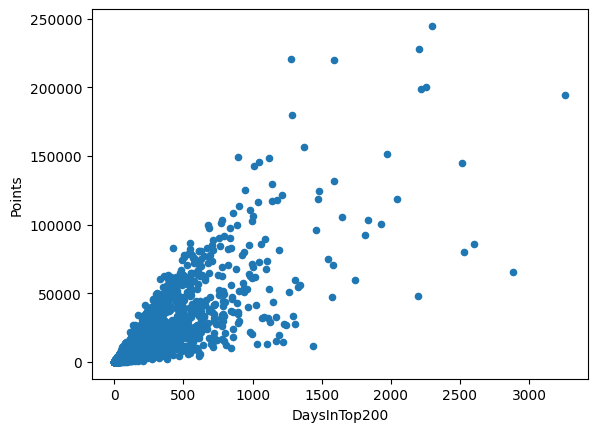

In [16]:
df_pointsPerSong.plot.scatter(x="DaysInTop200", y="Points")

The relationship between the number of days a song is in the top 200 and the total number of points of the song is a positive linear realtionship, as shown in our scatterplot. This makes sense because a song earns points every day it is in the top 200, so we expect that songs that are in the top 200 longer will have more points. On the other hand, we notice that the relationship is only moderately strong, and relatively weak for large values of number of days in the top 200 and number of points. This is because some songs accumulate many points from staying in the top 5 for a month or two and then falling out of the top 200 sortly after, so those songs have high values for "Points" and moderate values for "DaysInTop200". Conversely, other songs may place around #175-#200, yet manage to stay in the top 200 for over a year, so they have moderate values for "Points" and large values for "DaysInTop200".

# Section 4: Data Science

One of the most useful features of Spotify, or any music streaming service, is to create playlists. I have noticed that different people organize their playlists in different ways. Some people like to sort playlists by genre, some sort by mood, and some may sort by other methods. This leads me to pose the question: "How would a machine that is not capable of listening to music like humans can create playlists?".

Now that we know how to use k-means clustering, we can create a machine learning model that groups the different songs into playlists for us, effectively creating playlists!

First, we will start by importing KMeans from sklearn and creating our model using the KMeans function with 10 centroids. 


In [17]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10)

Now, we must only use the columns of df_unique that have numerical values in our k-means model, so we will create an array of only those columns.

In [18]:
numerical_columns = ["Danceability", "Energy", "Speechiness", "Acousticness", "Instrumentalness", "Valence"]

Next, we can train our model using the data from our df_playlistGen DataFrame and our k-means clustering model with 10 clusters. 

In [19]:
model.fit(df_unique[numerical_columns])

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10)

Now, we can use the predict function to assign every song to a cluster, or "playlist"!

In [20]:
df_playlists = df_unique
df_playlists["playlist"] = model.predict(df_playlists[numerical_columns])
df_playlists

,Title,Artists,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,id,playlist
0,Ella Baila Sola,"Eslabon Armado, Peso Pluma",0.668,0.758,0.033,0.483,0.000,0.834,3qQbCzHBycnDpGskqOWY0E,0
1,WHERE SHE GOES,Bad Bunny,0.652,0.800,0.061,0.143,0.629,0.234,7ro0hRteUMfnOioTFI5TG1,8
2,La Bebe - Remix,"Yng Lvcas, Peso Pluma",0.812,0.479,0.333,0.213,0.000,0.559,2UW7JaomAMuX9pZrjVpHAU,4
3,Cupid - Twin Ver.,FIFTY FIFTY,0.783,0.592,0.033,0.435,0.000,0.726,7FbrGaHYVDmfr7KoLIZnQ7,0
4,un x100to,"Grupo Frontera, Bad Bunny",0.569,0.724,0.047,0.228,0.000,0.562,6pD0ufEQq0xdHSsRbg9LBK,7
...,...,...,...,...,...,...,...,...,...,...
9248,Bobo,J Balvin,0.729,0.888,0.122,0.117,0.000,0.800,7AtlMCIauSQZqiXSlbBPW6,2
9249,Stay (feat. Maty Noyes),Kygo,0.648,0.736,0.039,0.044,0.000,0.378,2FiSTH0GYpIioUgjfzMIja,7
9250,Purple Lamborghini (with Rick Ross),Skrillex,0.457,0.899,0.132,0.002,0.000,0.298,6JyuJFedEvPmdWQW0PkbGJ,7
9251,Paper Planes,M.I.A.,0.447,0.848,0.222,0.033,0.000,0.485,1kusepF3AacIEtUTYrw4GV,7


In order to get an idea of how our model grouped the songs into playlists, we can use conditionals to return only the observations of the DataFrame that are assigned to a specific playlist. 

In [21]:
df_playlists[df_playlists["playlist"] == 1]

,Title,Artists,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,id,playlist
16,"Angel Pt. 1 (feat. Jimin of BTS, JVKE & Muni L...","Kodak Black, NLE Choppa, Jimin, JVKE, Muni Long",0.715,0.681,0.113,0.129,0.000,0.277,1vvcEHQdaUTvWt0EIUYcFK,1
22,I Wanna Be Yours,Arctic Monkeys,0.464,0.417,0.026,0.136,0.022,0.479,5XeFesFbtLpXzIVDNQP22n,1
32,Hits Different,Taylor Swift,0.672,0.782,0.042,0.148,0.000,0.239,3xYJScVfxByb61dYHTwiby,1
45,Yellow,Coldplay,0.429,0.661,0.028,0.002,0.000,0.285,3AJwUDP919kvQ9QcozQPxg,1
48,Unholy (feat. Kim Petras),"Sam Smith, Kim Petras",0.712,0.463,0.080,0.011,0.000,0.206,0NZPBYD5qbEWRs3PrGiRkT,1
...,...,...,...,...,...,...,...,...,...,...
9185,What The Price,Migos,0.787,0.625,0.054,0.293,0.000,0.215,7sO0dVFCfixpLshm4daMH3,1
9191,Please Don't Go,Joel Adams,0.513,0.768,0.059,0.012,0.000,0.235,3cNjgVBKTJ1SvKhunrCdVy,1
9220,Say It (feat. Tove Lo),Flume,0.598,0.532,0.030,0.067,0.000,0.261,4sQMalN597HdggTu196aL0,1
9229,Feel Me,"Tyga, Kanye West",0.442,0.636,0.262,0.124,0.000,0.251,2Cth0v1xri32oZ799rL3rl,1


In [22]:
df_playlists[df_playlists["playlist"] == 2]

,Title,Artists,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,id,playlist
5,Flowers,Miley Cyrus,0.707,0.681,0.067,0.063,0.0,0.646,4DHcnVTT87F0zZhRPYmZ3B,2
10,Classy 101,"Feid, Young Miko",0.859,0.658,0.159,0.145,0.0,0.672,6XSqqQIy7Lm7SnwxS4NrGx,2
11,TQM,Fuerza Regida,0.786,0.853,0.059,0.273,0.0,0.963,368eeEO3Y2uZUQ6S5oIjcu,2
21,El Azul,"Junior H, Peso Pluma",0.558,0.648,0.055,0.226,0.0,0.844,1haJsMtoBhHfvuM7XWuT3W,2
23,All My Life (feat. J. Cole),"Lil Durk, J. Cole",0.787,0.570,0.225,0.045,0.0,0.733,6T7FXSuXykeGktMLGp8WgE,2
...,...,...,...,...,...,...,...,...,...,...
9244,Sugar,Maroon 5,0.748,0.788,0.033,0.059,0.0,0.884,494OU6M7NOf4ICYb4zWCf5,2
9246,Desde Esa Noche (feat. Maluma),Thalia,0.780,0.929,0.053,0.171,0.0,0.837,1pWYnQIlqxTh5bxuPmTG4E,2
9247,La Gozadera (feat. Marc Anthony),Gente De Zona,0.616,0.989,0.048,0.166,0.0,0.902,0OMRAvrtLWE2TvcXorRiB9,2
9248,Bobo,J Balvin,0.729,0.888,0.122,0.117,0.0,0.800,7AtlMCIauSQZqiXSlbBPW6,2


In [23]:
df_playlists[df_playlists["playlist"] == 3]

,Title,Artists,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,id,playlist
14,Creepin' (with The Weeknd & 21 Savage),"Metro Boomin, The Weeknd, 21 Savage",0.715,0.620,0.048,0.417,0.000,0.172,2dHHgzDwk4BJdRwy9uXhTO,3
19,Last Night,Morgan Wallen,0.492,0.675,0.039,0.467,0.000,0.478,7K3BhSpAxZBznislvUMVtn,3
31,Here With Me,d4vd,0.574,0.469,0.025,0.534,0.000,0.288,78Sw5GDo6AlGwTwanjXbGh,3
40,golden hour,JVKE,0.515,0.593,0.032,0.653,0.162,0.153,5odlY52u43F5BjByhxg7wg,3
52,Frágil,"Yahritza Y Su Esencia, Grupo Frontera",0.605,0.726,0.031,0.365,0.000,0.393,4JdSXF2p71cr8uCY3UiJM0,3
...,...,...,...,...,...,...,...,...,...,...
9206,Say Something Loving,The xx,0.627,0.721,0.030,0.296,0.000,0.383,728zbo72kOoYdGR3AhNsyF,3
9210,I Dare You,The xx,0.752,0.543,0.040,0.623,0.071,0.282,044qU7kwVZaDwzWnRsmVVL,3
9215,Cool Girl,Tove Lo,0.671,0.710,0.109,0.335,0.000,0.233,5dKyZWlgjWw1oJgLa4GCZD,3
9216,Immortal,J. Cole,0.744,0.430,0.309,0.455,0.000,0.266,6AGON2BGdPmPMJGiiNuuwl,3


In [24]:
df_playlists[df_playlists["playlist"] == 4]

,Title,Artists,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,id,playlist
2,La Bebe - Remix,"Yng Lvcas, Peso Pluma",0.812,0.479,0.333,0.213,0.0,0.559,2UW7JaomAMuX9pZrjVpHAU,4
42,Starboy,"The Weeknd, Daft Punk",0.679,0.587,0.276,0.141,0.0,0.486,7MXVkk9YMctZqd1Srtv4MB,4
51,Hey Mor,"Ozuna, Feid",0.901,0.589,0.289,0.003,0.0,0.399,1zsPaEkglFvxjAhrM8yhpr,4
97,Area Codes,Kali,0.823,0.388,0.491,0.019,0.0,0.507,7sliFe6W30tPBPh6dvZsIH,4
101,Trance (with Travis Scott & Young Thug),"Metro Boomin, Travis Scott, Young Thug",0.571,0.549,0.404,0.180,0.0,0.447,5wG3HvLhF6Y5KTGlK0IW3J,4
...,...,...,...,...,...,...,...,...,...,...
9177,Brown Paper Bag,Migos,0.907,0.489,0.158,0.048,0.0,0.252,5wihevBA7MO9PNYyWyTfkh,4
9181,Culture (feat. DJ Khaled),Migos,0.825,0.700,0.243,0.038,0.0,0.317,4oLuMvGQ4WJfU2s4OM6nfE,4
9190,Neighbors,J. Cole,0.898,0.283,0.356,0.319,0.0,0.469,0utlOiJy2weVl9WTkcEWHy,4
9222,True Colors,The Weeknd,0.616,0.424,0.251,0.284,0.0,0.582,6i759FCuKx713ZnYjtpQGU,4


In [25]:
df_playlists[df_playlists["playlist"] == 5]

,Title,Artists,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,id,playlist
9,TQG,"KAROL G, Shakira",0.720,0.630,0.277,0.673,0.000,0.607,0DWdj2oZMBFSzRsi2Cvfzf,5
20,BESO,"ROSALÍA, Rauw Alejandro",0.768,0.644,0.136,0.736,0.001,0.530,609E1JCInJncactoMmkDon,5
26,Acróstico,Shakira,0.748,0.478,0.121,0.837,0.000,0.353,7txjUEY6McJDJKqIo1Rxjp,5
34,People,Libianca,0.573,0.422,0.068,0.551,0.000,0.693,26b3oVLrRUaaybJulow9kz,5
58,cardigan,Taylor Swift,0.613,0.581,0.042,0.537,0.000,0.551,4R2kfaDFhslZEMJqAFNpdd,5
...,...,...,...,...,...,...,...,...,...,...
9171,Same Time Pt. 1,"Big Sean, TWENTY88",0.630,0.488,0.254,0.708,0.000,0.719,7yoe9vbbzakNAXwb1UaWLS,5
9172,Sunday Morning Jetpack,"Big Sean, The-Dream",0.591,0.756,0.143,0.708,0.000,0.546,5VlstKgCJPHDIMCQO4jHcQ,5
9175,Intro,Big Sean,0.388,0.807,0.159,0.877,0.000,0.347,35k5ePiDMMdacA7jIF9RFY,5
9193,Moving On and Getting Over,John Mayer,0.850,0.461,0.053,0.591,0.041,0.621,1crSsvtU9wZB15dIQXV2QH,5


In [26]:
df_playlists[df_playlists["playlist"] == 6]

,Title,Artists,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,id,playlist
6,Daylight,David Kushner,0.508,0.430,0.034,0.830,0.000,0.324,1odExI7RdWc4BT515LTAwj,6
28,Say Yes To Heaven,Lana Del Rey,0.490,0.352,0.025,0.709,0.086,0.166,6GGtHZgBycCgGBUhZo81xe,6
39,Another Love,Tom Odell,0.442,0.538,0.045,0.717,0.000,0.139,7jtQIBanIiJOMS6RyCx6jZ,6
41,Until I Found You (with Em Beihold) - Em Beiho...,"Stephen Sanchez, Em Beihold",0.551,0.550,0.029,0.777,0.000,0.342,1Y3LN4zO1Edc2EluIoSPJN,6
53,Snow On The Beach (feat. More Lana Del Rey),"Taylor Swift, Lana Del Rey",0.664,0.401,0.034,0.806,0.000,0.315,4zmKGsrXjLmljb5fTaBTot,6
...,...,...,...,...,...,...,...,...,...,...
9214,Brave For You,The xx,0.540,0.417,0.031,0.664,0.000,0.281,53e5O0USYgSCv4md0CXpMY,6
9217,Test Me,The xx,0.253,0.177,0.042,0.904,0.062,0.040,3qLwtC9jEWugjkzyZlYgeg,6
9225,Give Me Love,Ed Sheeran,0.526,0.328,0.046,0.694,0.000,0.110,0SuG9kyzGRpDqrCWtgD6Lq,6
9227,Kiss Me,Ed Sheeran,0.589,0.227,0.050,0.640,0.005,0.182,0Tel1fmuCxEFV6wBLXsEdk,6


In [27]:
df_playlists[df_playlists["playlist"] == 7]

,Title,Artists,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,id,playlist
4,un x100to,"Grupo Frontera, Bad Bunny",0.569,0.724,0.047,0.228,0.000,0.562,6pD0ufEQq0xdHSsRbg9LBK,7
7,Kill Bill,SZA,0.644,0.735,0.039,0.052,0.144,0.418,1Qrg8KqiBpW07V7PNxwwwL,7
29,Cruel Summer,Taylor Swift,0.552,0.702,0.157,0.117,0.000,0.564,1BxfuPKGuaTgP7aM0Bbdwr,7
30,I'm Good (Blue),"David Guetta, Bebe Rexha",0.561,0.965,0.034,0.004,0.000,0.304,4uUG5RXrOk84mYEfFvj3cK,7
38,Tattoo,Loreen,0.545,0.779,0.075,0.243,0.000,0.303,1DmW5Ep6ywYwxc2HMT5BG6,7
...,...,...,...,...,...,...,...,...,...,...
9241,Kill Em With Kindness,Selena Gomez,0.757,0.884,0.040,0.008,0.000,0.398,7KxhSJOYiqCDclXDBNlFSZ,7
9245,Titanium (feat. Sia),David Guetta,0.604,0.787,0.103,0.068,0.150,0.301,2dOTkLZFbpNXrhc24CnTFd,7
9249,Stay (feat. Maty Noyes),Kygo,0.648,0.736,0.039,0.044,0.000,0.378,2FiSTH0GYpIioUgjfzMIja,7
9250,Purple Lamborghini (with Rick Ross),Skrillex,0.457,0.899,0.132,0.002,0.000,0.298,6JyuJFedEvPmdWQW0PkbGJ,7


In [28]:
df_playlists[df_playlists["playlist"] == 8]

,Title,Artists,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,id,playlist
1,WHERE SHE GOES,Bad Bunny,0.652,0.800,0.061,0.143,0.629,0.234,7ro0hRteUMfnOioTFI5TG1,8
88,La Jumpa,"Arcángel, Bad Bunny",0.887,0.234,0.178,0.111,0.670,0.197,2mnXxnrX5vCGolNkaFvVeM,8
136,Apocalypse,Cigarettes After Sex,0.369,0.467,0.027,0.019,0.460,0.174,3AVrVz5rK8Hrqo9YGiVGN5,8
182,METAMORPHOSIS,INTERWORLD,0.593,0.641,0.099,0.426,0.901,0.147,2ksyzVfU0WJoBpu8otr4pz,8
263,hotline (edit),Billie Eilish,0.516,0.254,0.059,0.816,0.855,0.304,0WFryfbNKPXVtVQlz5dZ8H,8
...,...,...,...,...,...,...,...,...,...,...
8953,Busted and Blue,Gorillaz,0.183,0.458,0.046,0.876,0.776,0.066,04zxGiXcmNQ0m9oDXtwo18,8
9076,Hypnotised,Coldplay,0.513,0.683,0.032,0.339,0.739,0.153,5LXj9Ch3O9ATm1NoHT8GXn,8
9097,"Mia & Sebastian's Theme - From ""La La Land"" So...",Justin Hurwitz,0.429,0.188,0.057,0.977,0.903,0.184,1R17cgUv6HeQFa78dzqb7s,8
9211,Lips,The xx,0.523,0.591,0.054,0.494,0.511,0.195,1onfcprzpSGh2LqrBh17AA,8


In [29]:
df_playlists[df_playlists["playlist"] == 9]

,Title,Artists,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,id,playlist
12,Anti-Hero,Taylor Swift,0.637,0.643,0.052,0.130,0.000,0.533,0V3wPSX9ygBnCm8psDIegu,9
15,Die For You (with Ariana Grande) - Remix,"The Weeknd, Ariana Grande",0.575,0.500,0.071,0.227,0.000,0.506,4W4fNrZYkobj539TOWsLO2,9
18,Angels Like You,Miley Cyrus,0.672,0.642,0.031,0.098,0.000,0.494,1daDRI9ahBonbWD8YcxOIB,9
24,Die For You,The Weeknd,0.586,0.525,0.062,0.111,0.000,0.508,2LBqCSwhJGcFQeTHMVGwy3,9
25,Yandel 150,"Yandel, Feid",0.783,0.729,0.069,0.049,0.000,0.580,4FAKtPVycI4DxoOHC01YqD,9
...,...,...,...,...,...,...,...,...,...,...
9199,Can't Feel My Face,The Weeknd,0.702,0.770,0.048,0.124,0.000,0.593,6RsWqX8zABZLhZydXxEFOm,9
9207,Dangerous,The xx,0.774,0.709,0.047,0.002,0.002,0.565,33B2QbtAj8mbDpwvGTOnBt,9
9219,Miss You,James Hersey,0.880,0.605,0.053,0.104,0.005,0.626,7of1slAJIWrXxP8ikAHxje,9
9226,Wake Up Where You Are,State of Sound,0.706,0.674,0.034,0.110,0.001,0.545,2s76aKBWKShlwPC4xTtEEE,9


In [30]:
df_playlists[df_playlists["playlist"] == 0]

,Title,Artists,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,id,playlist
0,Ella Baila Sola,"Eslabon Armado, Peso Pluma",0.668,0.758,0.033,0.483,0.000,0.834,3qQbCzHBycnDpGskqOWY0E,0
3,Cupid - Twin Ver.,FIFTY FIFTY,0.783,0.592,0.033,0.435,0.000,0.726,7FbrGaHYVDmfr7KoLIZnQ7,0
8,As It Was,Harry Styles,0.520,0.731,0.056,0.342,0.001,0.662,4Dvkj6JhhA12EX05fT7y2e,0
13,Calm Down (with Selena Gomez),"Rema, Selena Gomez",0.799,0.802,0.037,0.429,0.001,0.811,1s7oOCT8vauUh01PbJD6ps,0
17,See You Again (feat. Kali Uchis),"Tyler, The Creator, Kali Uchis",0.558,0.559,0.096,0.371,0.000,0.620,7KA4W4McWYRpgf0fWsJZWB,0
...,...,...,...,...,...,...,...,...,...,...
9174,Falling,Alesso,0.709,0.720,0.037,0.263,0.000,0.675,3d9JucRI60arArgQXqtfjJ,0
9179,Deu Onda,MC G15,0.931,0.604,0.057,0.456,0.000,0.864,0EPxmvsG1BY5td4aTOkWBF,0
9180,OOOUUU,Young M.A,0.635,0.847,0.447,0.533,0.000,0.568,7JYsArznYOjX2jsrT3UEnL,0
9202,High For Hours,J. Cole,0.870,0.446,0.424,0.449,0.000,0.684,4WfjYOo0JxommRm1PyObJl,0


It appears that the k-means clustering model is doing a great job fitting the songs to different playlists according to the parameters abuot each song we pull from the Spotify API. In particular, it seems that the categories are mostly defined by the "Instrumentalness" and "Valence" columns, because those are the columns that have the greatest disparities across the different playlists. Since the playlists will be slightly different each time, I cannot point to specific examples, but I have ran predictions on the model several times and noticed songs by the same artist and songs with similar moods or genres being grouped together. 

# Section 5: Overall Summary

For my data science project, I analyzed a dataset from Kaggle that contains the top 200 songs on Spotify everyday from January 1, 2017 to May 29, 2023. I began by conducting exploratory data analysis on the various parameters for each song in the dataset pulled from the Spotify API as well as a points system that the compiler of the Kaggle dataset added to measure the popularity of a song. Since there were some "Loudness" values that were outside of the reasonable range for songs across all genres, I created a new dataframe that dropped the observations from the original dataframe with unreasonable "Loudness" values. Furthermore, songs that lasted in the top 200 for several days or had multiple authors appeared in the original dataframe several times, so I created a dataframe with only a single observation for every song. In order to analyze which artists had the greatest number of points, I grouped by artist in our orginal dataframe and aggregated the points column using "sum" to calculate the total number of points. I repeated a similar process to determine the songs with the greatest number of points by grouping by the song title and author in the original dataframe and aggregating using "sum". 

Then, I was curious how well the points system would correspond to longevity in the top 200, so I created a scatterplot with the number of days spent in the top 200 on the x-axis and the total number of points on the y-axis. I found that there is a moderately strong, linear, positive relationship between the number of days a song spent in the top 200 and the total number of points the song has. Finally, I wondered how well a machine could create playlists of similar songs using the various parameters in our dataset of unique songs. To test this out, I created a k-means clustering model with 10 centroids. The model sorted the songs in the dataset into groups pretty well, placing similar artists and songs together. Comparing and contrasting the songs in the different playlists, I noticed that the "Valence" (happy or sad) and "Instrumentalness" (how likely a song is to be instrumental) influenced the categorization of songs into different playlists the most, since those had the largest differences between playlists.